# Predicting The Stanley Cup Champion of 2023

## <p style="text-align: right;"> &#9989; Trevor Locknane, Ritik Jain, Jacob Brandt, Lucas Reath</p>

In [2]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [22]:
# reading in the csv file made with the stats of NHL teams in the playoffs as of 4/4/2023
df = pd.read_csv('NHL_Standings23.csv', header=0, error_bad_lines=False)
east = df[df['Conference']=='Eastern']
west = df[df['Conference']=='Western']

east.head()

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
0,1,Eastern,Boston Bruins,77,60,12,5,125,1.623,286,166,120,3.71,2.16,1.558,22.3,86.9,93.12
1,2,Eastern,Carolina Hurricanes,76,49,18,9,107,1.408,248,196,52,3.26,2.58,0.684,20.5,84.0,90.73
2,3,Eastern,New Jersey Devils,77,48,21,8,104,1.351,266,216,50,3.45,2.81,0.649,21.4,82.0,90.67
4,5,Eastern,New York Rangers,77,45,21,11,101,1.312,261,207,54,3.39,2.69,0.701,22.8,80.8,91.22
5,6,Eastern,Toronto Maple Leafs,76,45,21,10,100,1.316,258,211,47,3.39,2.78,0.618,25.7,80.5,91.00


In [23]:
west.head()

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
3,4,Western,Vegas Golden Knights,77,48,22,7,103,1.338,257,220,37,3.34,2.86,0.481,20.7,77.5,91.43
6,7,Western,Los Angeles Kings,77,45,22,10,100,1.299,266,242,24,3.45,3.14,0.312,25.3,75.7,89.14
7,8,Western,Edmonton Oilers,77,45,23,9,99,1.286,306,254,52,3.97,3.30,0.675,32.4,76.1,90.06
8,9,Western,Dallas Stars,77,42,21,14,98,1.273,267,213,54,3.47,2.77,0.701,24.0,83.2,91.48
9,10,Western,Minnesota Wild,77,44,23,10,98,1.273,232,209,23,3.01,2.71,0.299,21.7,81.3,91.96


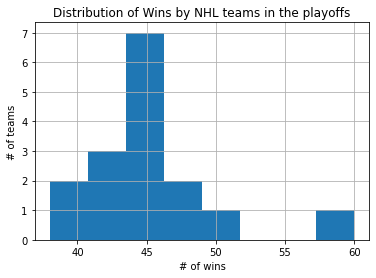

In [31]:
plt.hist(df['Wins'], bins=8)
plt.xlabel('# of wins')
plt.ylabel('# of teams')
plt.title('Distribution of Wins by NHL teams in the playoffs')
plt.grid()

### 5-Year Historical Data of Champions

- This data will be used to find the winning characteristics of past champions

In [8]:
historical_champs_5Y_df = pd.read_csv('historical_nhl_champions_5Y.csv')
winning_teams = historical_champs_5Y_df[historical_champs_5Y_df['Team'] != 'League Average']
league_averages = historical_champs_5Y_df[historical_champs_5Y_df['Team'] == 'League Average']
historical_champs_5Y_df

,Year,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PPOA,PK%,SH,SHA,S,S%,SA,SV%,PDO,SO
0,2022,Colorado Avalanche,28.2,82,56,19,7,119,0.726,308,...,236,79.66,6,5,2874,10.7,2625,0.912,101.2,7
1,2022,League Average,28.2,82,41,32,9,91,0.555,255,...,237,79.39,7,7,2593,9.8,2593,0.902,NaN,4
2,2021,Tampa Bay Lightning,28.4,56,36,17,3,75,0.670,180,...,183,84.15,3,3,1692,10.6,1583,0.908,100.8,6
3,2021,League Average,28.1,56,28,22,6,62,0.556,162,...,162,80.22,4,4,1678,9.7,1678,0.903,NaN,4
4,2020,Tampa Bay Lightning,27.7,70,43,21,6,92,0.657,243,...,231,81.39,6,7,2176,11.2,2165,0.910,101.9,4
5,2020,League Average,27.9,70,35,27,8,78,0.558,208,...,208,79.97,6,6,2192,9.5,2192,0.905,NaN,4
6,2019,St. Louis Blues,28.0,82,45,28,9,99,0.604,244,...,232,81.47,5,7,2604,9.4,2345,0.906,100.2,9
7,2019,League Average,27.9,82,41,32,9,91,0.553,244,...,239,80.22,8,8,2579,9.5,2579,0.905,NaN,5
8,2018,Washington Capitals,28.4,82,49,26,7,105,0.640,256,...,269,80.30,4,8,2379,10.8,2613,0.909,101.4,3
9,2018,League Average,28.0,82,41,31,10,92,0.558,240,...,250,79.82,7,7,2620,9.2,2620,0.908,NaN,5


#### Winning Teams vs League Average Wins and Losses

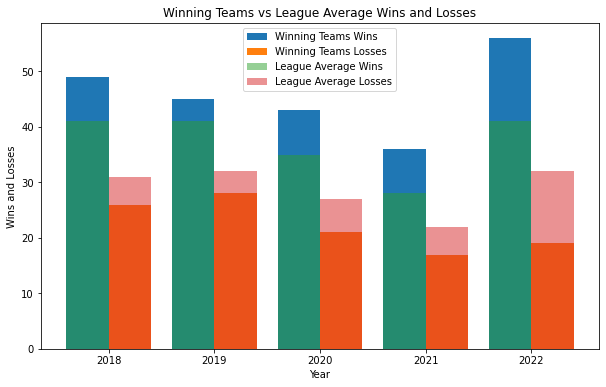

In [10]:
plt.figure(figsize=(10, 6))

# Plot Champion 
plt.bar(winning_teams['Year'], winning_teams['W'], width=-0.4, align='edge', label='Winning Teams Wins')
plt.bar(winning_teams['Year'], winning_teams['L'], width=0.4, align='edge', label='Winning Teams Losses')

# Plot League Average
plt.bar(league_averages['Year'], league_averages['W'], width=-0.4, align='edge', alpha=0.5, label='League Average Wins')
plt.bar(league_averages['Year'], league_averages['L'], width=0.4, align='edge', alpha=0.5, label='League Average Losses')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Wins and Losses')
plt.title('Winning Teams vs League Average Wins and Losses')
plt.legend()


#### Save Percentage of Winning Teams vs League Average

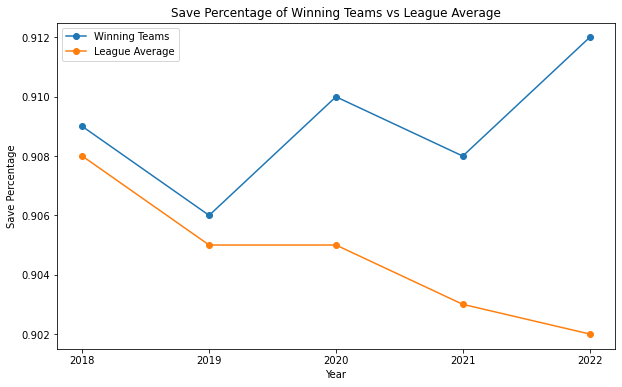

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['SV%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['SV%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Save Percentage')
plt.title('Save Percentage of Winning Teams vs League Average')
plt.legend()


#### Power Play Percentage of Winning Teams vs League Average

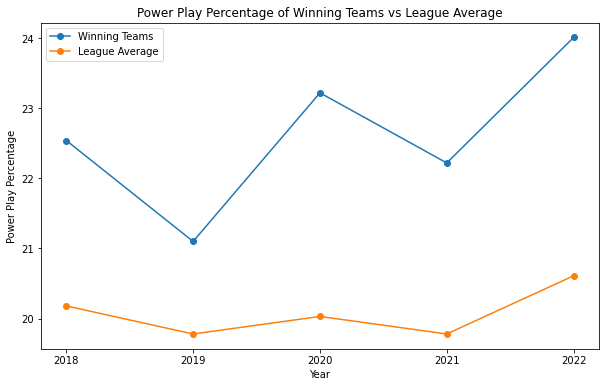

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['PP%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['PP%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Power Play Percentage')
plt.title('Power Play Percentage of Winning Teams vs League Average')
plt.legend()

#### Penalty Kill Percentage of Winning Teams vs League Average

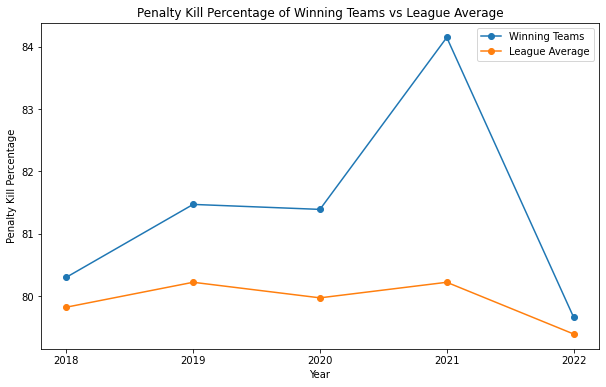

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['PK%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['PK%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Penalty Kill Percentage')
plt.title('Penalty Kill Percentage of Winning Teams vs League Average')
plt.legend()